In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
data = pd.read_csv("50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data1 = data.rename({'R&D Spend':'spend','Marketing Spend':'marspend'},axis=1)
data1

,spend,Administration,marspend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# Correlation Matrix

In [5]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [ ]:
# Scatterplot between variables along with histograms

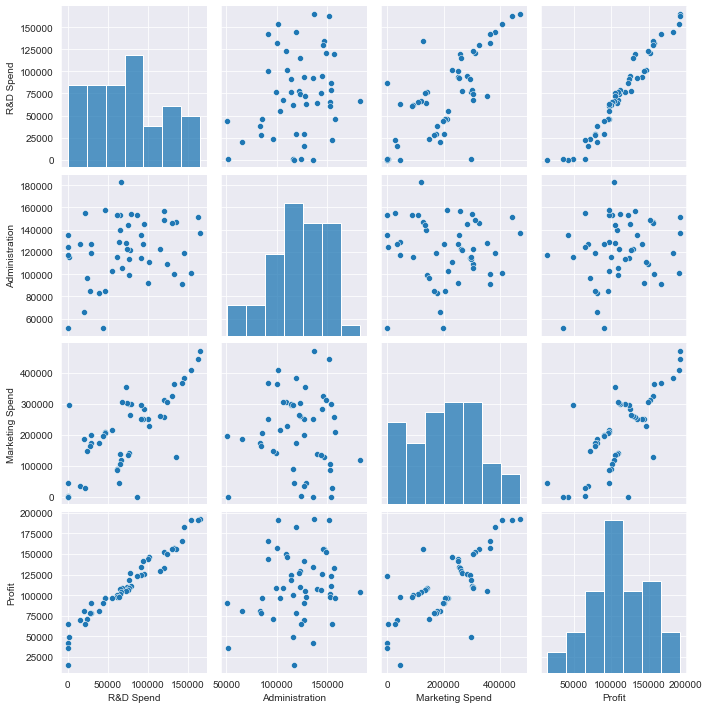

In [6]:
# Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [ ]:
# preparing a model

In [16]:
# Build model
model = smf.ols('spend ~ Administration + marspend + Profit', data=data1).fit()

In [17]:
model.params

Intercept        -59040.495616
Administration        0.083980
marspend              0.005184
Profit                1.084499
dtype: float64

In [18]:
#t and p-Values
print(model.tvalues,'\n',model.pvalues)

Intercept         -7.898458
Administration     1.446083
marspend           0.264055
Profit            17.846374
dtype: float64 
 Intercept         4.176203e-10
Administration    1.549335e-01
marspend          7.929167e-01
Profit            2.634968e-22
dtype: float64


In [19]:
# R squared values
(model.rsquared,model.rsquared_adj)

(0.9488830971212534, 0.9455493860639439)

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  spend   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     284.6
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           1.06e-29
Time:                        22:10:01   Log-Likelihood:                -532.81
No. Observations:                  50   AIC:                             1074.
Df Residuals:                      46   BIC:                             1081.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5.904e+04   7474.939     -7.898      0.000   -7.41e+04    -4.4e+04
Administration     0.0840      0.058      1.446      0.155      -0.033       0.201
marspend           0.0052      0.020      0.264      0.793      -0.034       0.045
Profit             1.0845      0.061     17.846      0.000       0.962       1.207
==============================================================================
Omnibus:                        6.269   Durbin-Watson:                   1.256
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.578
Skew:                           0.562   Prob(JB):                       0.0615
Kurtosis:                       4.189   Cond. No.                     1.43e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# simple linear regression models

In [22]:
ml_w = smf.ols('spend ~ Administration ',data = data1).fit()
print(ml_w.tvalues,'/n',ml_w.pvalues)

Intercept         0.897073
Administration    1.727648
dtype: float64 /n Intercept         0.374157
Administration    0.090481
dtype: float64


In [23]:
ml_w = smf.ols('spend ~ Administration + marspend ',data = data1).fit()
print(ml_w.tvalues,'/n',ml_w.pvalues)

Intercept        -1.807194
Administration    2.858702
marspend          7.889568
dtype: float64 /n Intercept         7.713519e-02
Administration    6.322635e-03
marspend          3.724804e-10
dtype: float64


In [ ]:
#calculating VIF

In [25]:
rsq_sp = smf.ols('spend ~ Administration + marspend + Profit',data=data1).fit().rsquared  
vif_sp = 1/(1-rsq_sp) # 16.33

rsq_ad = smf.ols('Administration ~ spend + marspend + Profit',data=data1).fit().rsquared  
vif_ad = 1/(1-rsq_ad) # 564.98

rsq_mar = smf.ols('marspend ~ spend + Administration+ Profit',data=data1).fit().rsquared  
vif_mar = 1/(1-rsq_mar) #  564.84

rsq_pr= smf.ols(' Profit~ Administration +spend + marspend ',data=data1).fit().rsquared  
vif_pr = 1/(1-rsq_pr) #  16.35

# Storing vif values in a data frame

d1 = {'Variables':['spend','administration','marspend','profit'],
      'VIF':[vif_sp,vif_ad,vif_mar,vif_pr]}

Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,spend,19.563001
1,administration,1.182146
2,marspend,2.465332
3,profit,20.302917


# residual analysis

In [27]:
sample = np.random.uniform(25,30,1000)
sample

array([29.98194368, 29.46878052, 25.51339647, 25.90401887, 29.78087664,
       28.46165018, 25.37070945, 25.48346078, 26.38967791, 28.87350921,
       27.78155126, 27.2720783 , 29.4515174 , 26.71164561, 25.91831954,
       25.99269423, 25.88422528, 26.56931989, 25.89788111, 28.9508989 ,
       29.93974756, 29.31437293, 28.52412372, 26.06265927, 28.46894972,
       27.70496766, 28.8993461 , 26.65845791, 28.36842618, 27.11008345,
       27.78587558, 27.32073595, 25.72941211, 25.48278461, 26.09561291,
       25.95323048, 27.35652609, 27.86822327, 29.01502711, 28.53508108,
       29.20012327, 29.20630739, 26.47402077, 25.23090791, 26.6113742 ,
       28.41318793, 27.78842562, 28.42915215, 26.37237256, 25.4590066 ,
       29.43541992, 28.03193079, 26.45024689, 26.17467637, 26.04894817,
       26.29551178, 27.17688309, 27.11930208, 28.29315001, 27.87809207,
       25.73433616, 28.84723793, 26.23959232, 26.93499819, 26.03999361,
       25.60437198, 28.47206642, 29.97343194, 25.9083994 , 26.24

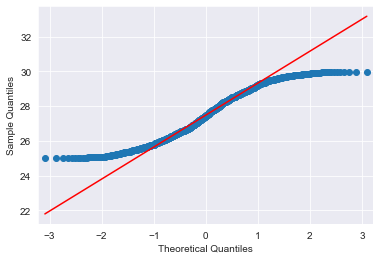

In [28]:
import statsmodels.api as sm
qqplot = sm.qqplot(sample,line='q')

# Test for Normality of Residuals (q-q plot)

In [29]:
residuals=model.resid
residuals

0      1939.514805
1     -1373.986139
2     -5320.894598
3     -6896.707228
4     11343.877068
5     10397.161614
6     11317.328870
7      6524.457967
8       404.641835
9      9252.924825
10    -7991.233883
11    -5739.994540
12   -12632.682656
13    -7312.034308
14    20699.627884
15    21014.761956
16   -12252.264161
17     4085.095014
18     4904.958829
19     -583.397723
20    -4301.484044
21     2243.338514
22     1474.426549
23    -1809.783645
24     9293.498710
25    -5209.627004
26     6901.928768
27     4697.704838
28    -2868.760699
29     1699.435076
30     2468.723343
31     1174.747273
32     5698.120459
33     -189.657989
34   -13754.333189
35    -7785.123871
36   -22381.547230
37      232.530365
38   -15321.481927
39     1872.285869
40    -7907.587058
41    -5405.988289
42    -3703.889469
43   -11989.160236
44    -2639.044491
45   -20807.856524
46    -4583.207970
47     1511.285830
48    16549.346988
49    33060.005620
dtype: float64

C:\Users\tanuc\desktop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

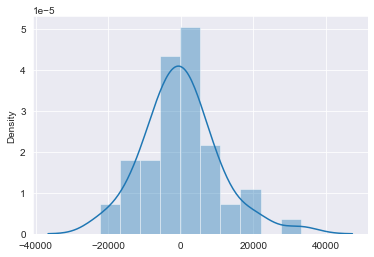

In [30]:
sns.distplot(residuals)

In [31]:
residuals.mean()

-6.257323548197746e-12

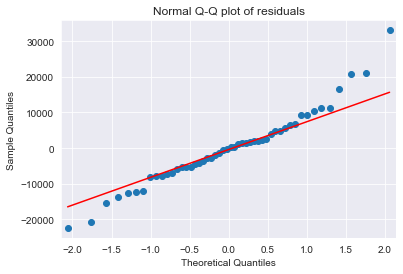

In [32]:
qqplot=sm.qqplot(model.resid, line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [38]:
list(np.where(residuals>20000))

[array([14, 15, 49], dtype=int64)]

In [39]:
predictions = model.fittedvalues
predictions

0     163409.685195
1     163971.686139
2     158762.404598
3     151269.117228
4     130763.462932
5     121479.738386
6     123298.131130
7     123773.672033
8     120137.878165
9     114081.955175
10    109904.313883
11    106411.954540
12    106496.432656
13     99304.424308
14     99243.612116
15     93508.848044
16     90265.374161
17     90572.064986
18     86844.201171
19     87003.097723
20     80555.344044
21     76146.131486
22     72520.133451
23     69342.313645
24     67750.511290
25     69874.337004
26     68426.941232
27     67409.895162
28     68920.280699
29     63906.044924
30     59525.756657
31     59961.632727
32     57710.739541
33     55683.607989
34     60180.403189
35     53799.143871
36     51045.307230
37     43837.419635
38     35551.071927
39     36686.224131
40     36661.917058
41     33298.908289
42     27344.819469
43     27494.890236
44     24816.784491
45     21808.086524
46      5898.667970
47     -1511.285830
48    -16007.296988
49    -33060.005620


In [44]:
new_data=({'spend':162500.70,"Administration":1302897.80,"marspend":607934.54,"State":'Florida',"profit":182901.00})
pd.DataFrame(new_data,index=[0])


,spend,Administration,marspend,State,profit
0,162500.7,1302897.8,607934.54,Florida,182901.0


In [ ]:
# Residual plot for homoscedasticity

In [45]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

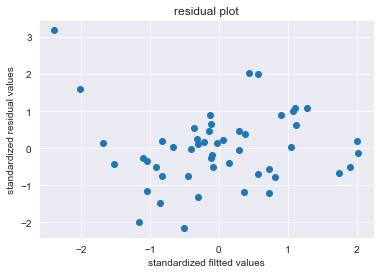

In [46]:
plt.scatter(get_standardized_values(predictions),
           get_standardized_values(residuals))
plt.title('residual plot')
plt.xlabel('standardized filtted values')
plt.ylabel('standardized residual values')
plt.show()

In [ ]:
# Residual VS Regressors

eval_env: 1


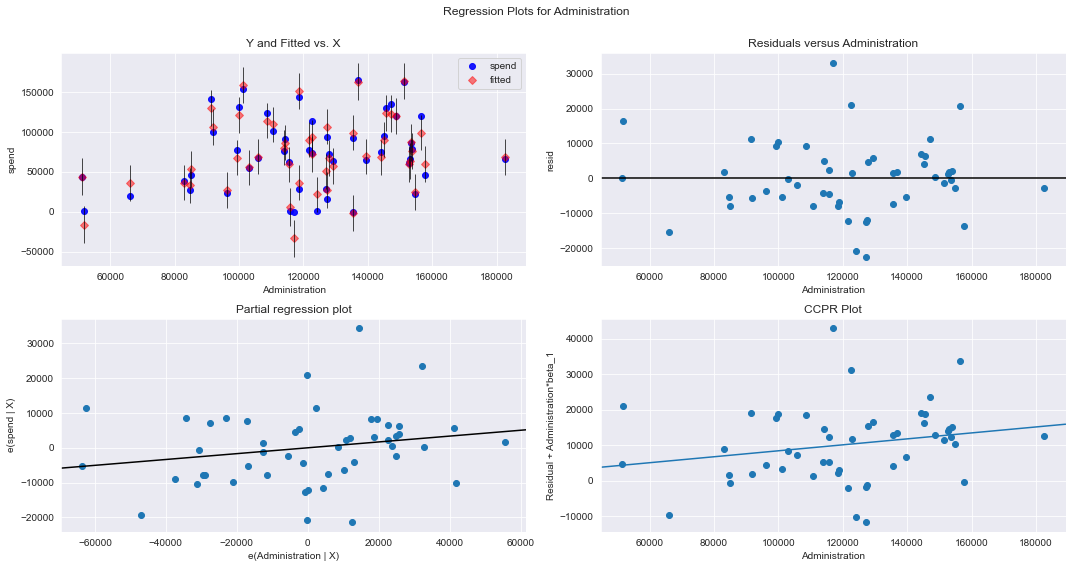

In [50]:
fig = plt .figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'Administration',fig =fig)
plt.show()

eval_env: 1


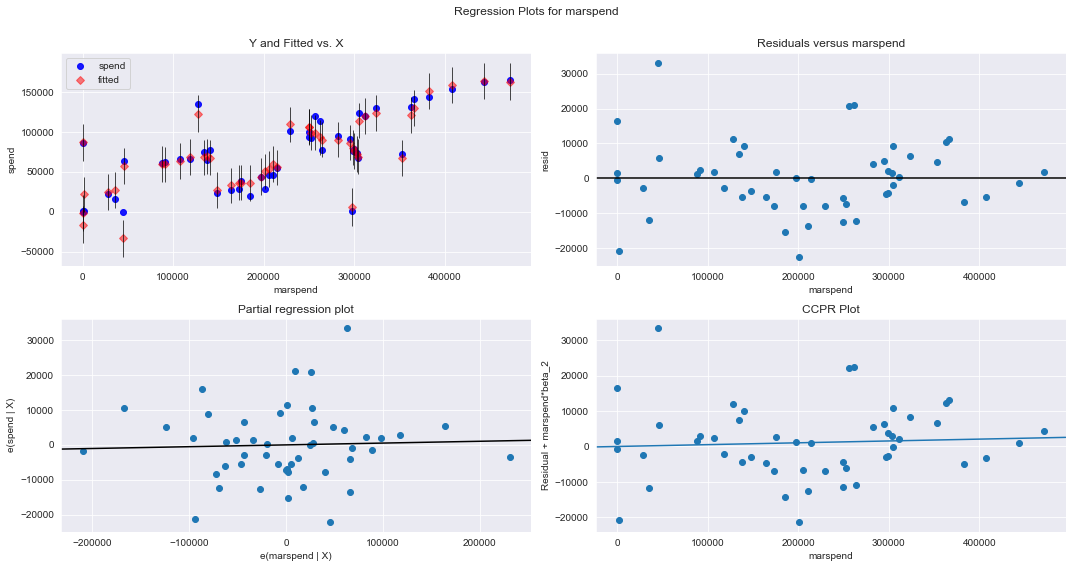

In [51]:
fig = plt .figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'marspend',fig =fig)
plt.show()

eval_env: 1


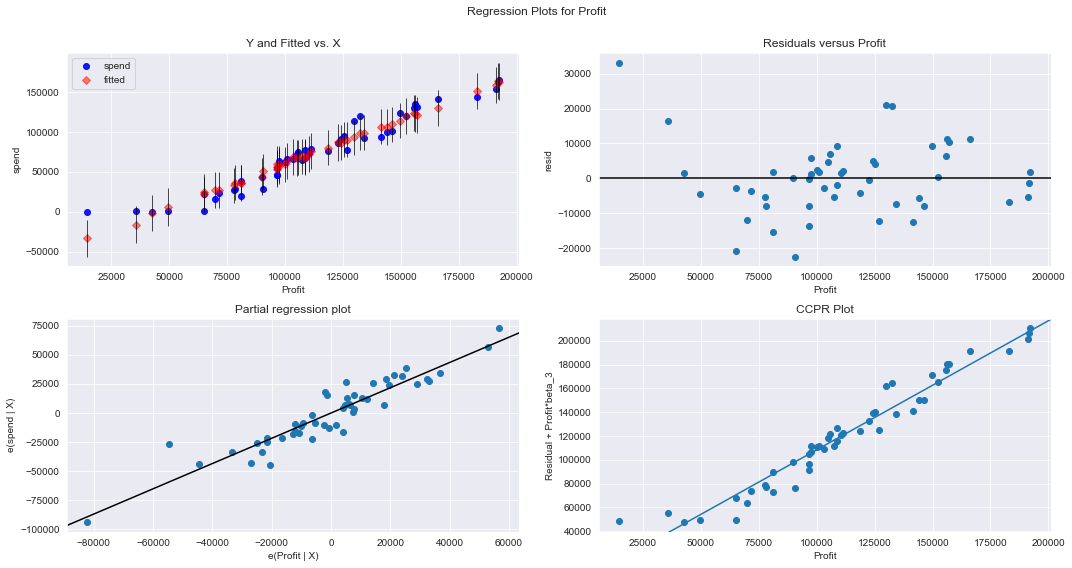

In [52]:
fig = plt .figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'Profit',fig =fig)
plt.show()

In [ ]:
# Model Deletion Diagnostics
#Detecting Influencers / Outliers
#cook's Distance

In [54]:
model_influence = model.get_influence()
(c,_)= model_influence.cooks_distance

In [55]:
c

array([1.32686152e-03, 6.71327269e-04, 1.00848450e-02, 1.08778569e-02,
       3.25214083e-02, 1.86773367e-02, 5.72671973e-02, 5.78718853e-03,
       2.22688176e-05, 9.59918619e-03, 9.20054873e-03, 6.55469646e-03,
       1.24637952e-02, 3.65502131e-03, 5.84813034e-02, 2.46132141e-02,
       8.23306628e-03, 1.88350783e-03, 1.79034854e-03, 2.23366163e-04,
       1.61212333e-03, 1.26961562e-03, 2.74140867e-04, 4.19428589e-04,
       1.14799909e-02, 2.38077433e-03, 4.73968200e-03, 6.88977976e-03,
       3.02966525e-03, 4.29665651e-04, 7.86793745e-04, 2.26839434e-04,
       6.36387230e-03, 2.68148870e-06, 3.77469670e-02, 8.06673934e-03,
       4.06994630e-02, 2.42256101e-05, 6.52120059e-02, 5.53899638e-04,
       5.88130170e-03, 4.51009245e-03, 1.71003795e-03, 2.23226893e-02,
       1.80906333e-03, 8.94962581e-02, 2.00717682e-02, 6.12418917e-04,
       2.04633830e-01, 5.14612676e-01])

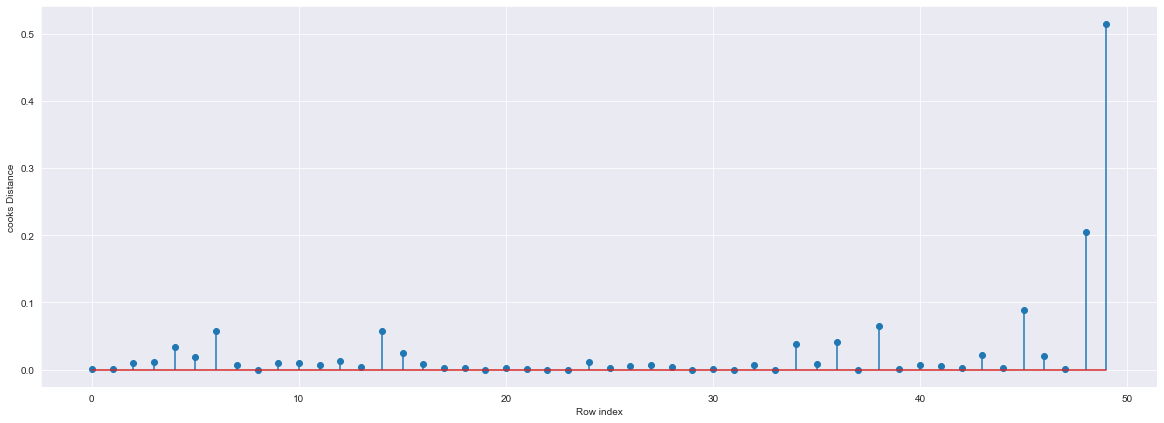

In [57]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize =(20,7))
plt.stem(np.arange(len(data1)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('cooks Distance')
plt.show()

In [58]:
# index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.5146126758750658)

# High Influence Points

<Figure size 1440x1440 with 0 Axes>

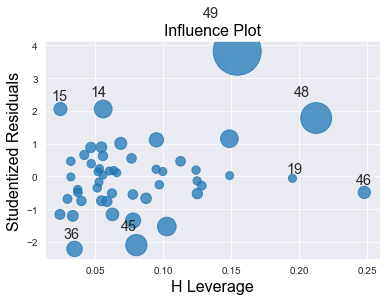

In [59]:
from statsmodels.graphics.regressionplots import influence_plot
plt.figure(figsize =(20,20))
influence_plot(model)
plt.show()

In [60]:
k= data1.shape[1]
n=data1.shape[0]
leverage_cutoff =3*((k+1)/n)
leverage_cutoff

0.36

In [62]:
#data1[data1.index.isin([80])]
data1.iloc[[49],:]

,spend,Administration,marspend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [5]:
#See the differences in HP and other variable values
data1.head()

,spend,Administration,marspend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
# Improving the model

In [6]:
data_new =pd.read_csv("50_Startups.csv")

In [7]:
data2= data.rename({'R&D Spend':'spend','Marketing Spend':'marspend'},axis=1)
data2

,spend,Administration,marspend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [65]:
# Discard the data points which are influencers and reasign the row number (reset_index())
data2=data_new.drop(data_new.index[[49]],axis=0).reset_index()

In [68]:
#Drop the original index
data2=data2.drop(['index'],axis=1)

In [73]:
data2

,spend,Administration,marspend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
# build model

In [78]:
#Exclude variable "Administration" and generate R-Squared and AIC values
final_ml_V= smf.ols('spend~ marspend+State + Profit',data = data2).fit()

In [79]:
(final_ml_V.rsquared, final_ml_V.aic, final_ml_V.bic)

(0.9466350960877766, 1077.780574562351, 1087.3406895894916)

In [80]:
#Exclude variable "marspend" and generate R-Squared and AIC values
final_ml_W= smf.ols('spend~Administration+ State + Profit',data = data2).fit()

In [81]:
(final_ml_W.rsquared, final_ml_W.aic, final_ml_W.bic)

(0.9488881085213821, 1075.6237685774854, 1085.183883604626)

# cook's distance

In [83]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

In [84]:
len(c_V)

50

Text(0, 0.5, 'Cooks Distance')

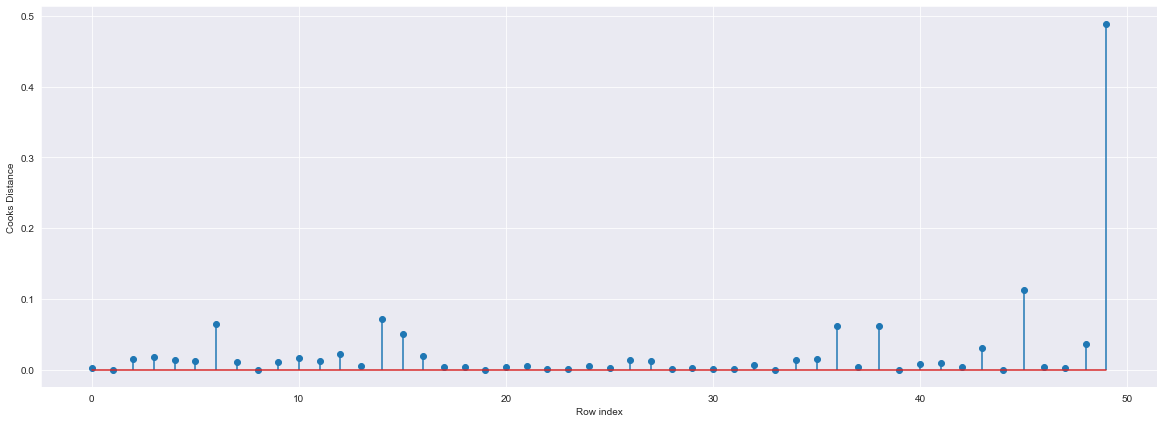

In [86]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data2)),np.round(c_V,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [87]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(49, 0.48877494609709254)

In [14]:
#Drop 49 observations
data3=data2.drop(data2.index[[49]],axis=0)

In [15]:
data3

,spend,Administration,marspend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [16]:
#Build the model on the new data
final_ml_V= smf.ols('spend~Administration+ State + Profit',data =data3 ).fit()

In [17]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.9597385188845271, 1040.9033615310714)

# Predicting for new data

In [18]:
new_data=({'spend':182500.70,"Administration":1452897.80,"marspend":607994.54,"State":'Florida',"Profit":202901.00})
pd.DataFrame(new_data,index=[0])


,spend,Administration,marspend,State,Profit
0,182500.7,1452897.8,607994.54,Florida,202901.0


In [19]:
final_ml_V.predict(new_data)

0    270219.491241
dtype: float64

In [20]:
pred_y = final_ml_V.predict(data3)

In [24]:
pred_y

0     167114.521821
1     165026.174265
2     161995.294013
3     155126.458674
4     132858.819090
5     124152.636648
6     123912.105722
7     124707.518219
8     122107.705909
9     113933.089857
10    111239.345132
11    106455.373153
12    107219.026774
13     98126.494206
14     98985.469796
15     94764.957976
16     88782.394675
17     91134.500245
18     86478.510174
19     88757.202275
20     78491.735800
21     75655.756884
22     71156.852625
23     68112.145683
24     68679.967566
25     67621.966038
26     67366.391986
27     66626.059123
28     67257.992024
29     63806.581512
30     58737.853754
31     59753.819347
32     55480.873847
33     54241.734050
34     56656.587524
35     53866.970014
36     48974.793943
37     41464.178329
38     35076.319413
39     33448.920610
40     32774.099750
41     31235.474768
42     23493.391815
43     26251.764901
44     20390.424942
45     20494.688970
46      1017.037972
47     -6877.350523
48    -18053.851270
dtype: float64

# table containing R^2 value for each prepared model

In [104]:
d2={'Prep_Models':['Model','final_ml_V'],'Rsquared':[model.rsquared,final_ml_V.rsquared]}
table=pd.DataFrame(d2)
table


,Prep_Models,Rsquared
0,Model,0.948883
1,final_ml_V,0.959739


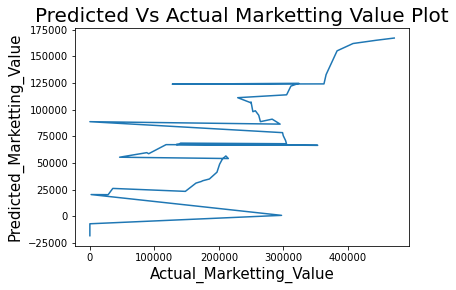

In [26]:

# Graph shows relation between Predicted and actual value
import matplotlib.pyplot as plt
data3.marspend # Actual Value
pred_y   # Predicted Value
plt.plot(data3.marspend,pred_y); plt.xlabel("Actual_Marketting_Value",size=15); plt.ylabel("Predicted_Marketting_Value",size = 15)
plt.title("Predicted Vs Actual Marketting Value Plot", size=20)
plt.show()
